# LEAD SCORING CASE STUDY

#### Problem Statement 
From the pool of leads,we need to select the most promising leads, i.e. the leads that are most likely to convert into paying customers for education company X Education which sells online courses to industry professionals. The company requires us to build a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.
The Company has given us the target of nearly 80% lead conversion rate.


# Step 1 : Importing useful Libraries

In [212]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import library for suppressing the warnings
import warnings
warnings.filterwarnings(action='ignore')

#sklearn libraries
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

#statsmodel libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [213]:
#Environment settings
pd.set_option("display.max_columns",40)

In [214]:
#Importing and reading the dataset
Leads= pd.read_csv('leads.csv')
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Step 2 : Inspecting & understanding the Data

In [215]:
Leads.shape

(9240, 37)

In [216]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [217]:
Leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [218]:
#Checking percentage of Null values
Leads.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [219]:
Leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

# Step 3 : Data Cleaning and Preparation

In [220]:
#Removing Unnecessary Columns and Columns having Null values more than 40%
Leads.drop(['Prospect ID','Last Activity','Asymmetrique Activity Index','Asymmetrique Profile Index', 'Asymmetrique Activity Score',
            'Asymmetrique Profile Score','How did you hear about X Education','Lead Profile','Lead Quality','Tags','Last Notable Activity'
            ], axis=1,inplace= True)

In [221]:
#Replacing 'Select' with Null as Select is of no use to us
Leads=Leads.replace('Select', np.NaN)

In [222]:
Leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No


## 3.1 Handling Missing values

### Checking the categorical columns :

In [223]:
Leads['City'].value_counts(dropna=False,normalize=True)*100

NaN                            39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

In [224]:
# Categorize cities into 'Non-Mumbai Maharashtra Cities' and 'Non-Maharashtra Cities' based on location
# Categorize all non-Mumbai, but Maharashtra cities
Leads.loc[(Leads['City'] == 'Thane & Outskirts') | (Leads['City'] == 'Other Cities of Maharashtra'), 
          'City'] = 'Non-Mumbai Maharashtra Cities'

# Categorize all other cities
Leads.loc[(Leads['City'] == 'Other Cities') | (Leads['City'] == 'Other Metro Cities') | 
          (Leads['City'] == 'Tier II Cities'), 
          'City'] = 'Non-Maharashtra Cities'
Leads['City'].value_counts(normalize=True)*100

Mumbai                           57.835218
Non-Mumbai Maharashtra Cities    21.701669
Non-Maharashtra Cities           20.463113
Name: City, dtype: float64

In [225]:
probabilities = [0.5784, 0.2170, 0.2046]

imputed = np.random.choice(['Mumbai', 'Non-Mumbai Maharashtra Cities', 'Non-Maharashtra Cities'], 
                                       size=len(Leads), p=probabilities)

Leads['City'] = Leads['City'].fillna(pd.Series(imputed, index=Leads.index))
Leads['City'].value_counts(normalize=True,dropna=False)*100

Mumbai                           57.932900
Non-Mumbai Maharashtra Cities    22.132035
Non-Maharashtra Cities           19.935065
Name: City, dtype: float64

In [226]:
Leads['Country'].value_counts(normalize=True, dropna=False)*100

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China                    0.021645
Belgium                  0.021645
Ghana                    0.021645
Kenya         

In [227]:
#Since 96.88% of the data contains either 'India' or NaN values, it's better to drop this column
Leads.drop('Country',axis=1,inplace=True)

In [228]:
Leads['Specialization'].value_counts(normalize=True,dropna=False)*100

NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [229]:
# Categorize different specializations into broader categories: Management, Business, and Industry Specializations
Leads.loc[(Leads['Specialization'] == 'Finance Management') | 
          (Leads['Specialization'] == 'Human Resource Management') | 
          (Leads['Specialization'] == 'Marketing Management') |  
          (Leads['Specialization'] == 'Operations Management') |
          (Leads['Specialization'] == 'IT Projects Management') | 
          (Leads['Specialization'] == 'Supply Chain Management') |
          (Leads['Specialization'] == 'Healthcare Management') | 
          (Leads['Specialization'] == 'Hospitality Management') |
          (Leads['Specialization'] == 'Retail Management'), 
          'Specialization'] = 'Management'

# Categorize all business courses
Leads.loc[(Leads['Specialization'] == 'Business Administration') | 
          (Leads['Specialization'] == 'International Business') | 
          (Leads['Specialization'] == 'Rural and Agribusiness') | 
          (Leads['Specialization'] == 'E-Business'), 
          'Specialization'] = 'Business'

# Categorize all industry courses
Leads.loc[(Leads['Specialization'] == 'Banking, Investment And Insurance') | 
          (Leads['Specialization'] == 'Media and Advertising') |
          (Leads['Specialization'] == 'Travel and Tourism') | 
          (Leads['Specialization'] == 'Services Excellence') |
          (Leads['Specialization'] == 'E-COMMERCE'), 
          'Specialization'] = 'Industry'


In [230]:
Leads['Specialization'].value_counts(normalize=True)*100

Management    72.576792
Industry      15.290102
Business      12.133106
Name: Specialization, dtype: float64

In [231]:
probabilities = [0.7258, 0.1529, 0.1213]

imputed = np.random.choice(['Management', 'Industry', 'Business'], 
                                       size=len(Leads), p=probabilities)

Leads['Specialization'] = Leads['Specialization'].fillna(pd.Series(imputed, index=Leads.index))
Leads['Specialization'].value_counts(normalize=True,dropna=False)*100

Management    72.359307
Industry      15.216450
Business      12.424242
Name: Specialization, dtype: float64

In [232]:
Leads['What is your current occupation'].value_counts(normalize=True,dropna=False)*100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [233]:
# Combining low-representing occupation categories into 'Student and Others' category
Leads.loc[(Leads['What is your current occupation'] == 'Student') | 
          (Leads['What is your current occupation'] == 'Other') | 
          (Leads['What is your current occupation'] == 'Housewife') | 
          (Leads['What is your current occupation'] == 'Businessman'), 
          'What is your current occupation'] = 'Student and Others'
Leads['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student and Others      0.037252
Name: What is your current occupation, dtype: float64

In [234]:
probabilities = [0.8550, 0.1078, 0.0372]

imputed = np.random.choice(['Unemployed', 'Working Professional', 'Student and Others'], 
                                       size=len(Leads), p=probabilities)

Leads['What is your current occupation'] = Leads['What is your current occupation'].fillna(pd.Series(imputed, index=Leads.index))
Leads['What is your current occupation'].value_counts(normalize=True,dropna=False)*100

Unemployed              85.757576
Working Professional    10.681818
Student and Others       3.560606
Name: What is your current occupation, dtype: float64

In [235]:
Leads['What matters most to you in choosing a course'].value_counts(normalize=True,dropna=False)*100

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

In [236]:
#Nearly 100% of the data consists of either 'Better Career Prospects' or NaN values, so it's better to drop this column
Leads.drop('What matters most to you in choosing a course',axis=1,inplace=True)

In [237]:
Leads.isnull().mean()*100

Lead Number                                 0.000000
Lead Origin                                 0.000000
Lead Source                                 0.389610
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 1.482684
Total Time Spent on Website                 0.000000
Page Views Per Visit                        1.482684
Specialization                              0.000000
What is your current occupation             0.000000
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.000000
Through Recommendations                     0.000000
Receive More Updates About Our Courses      0.

In [238]:
# Print the count of unique values for each object-type column in the Leads DataFrame
for k, v in Leads.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

Lead Origin = 5
Lead Source = 21
Do Not Email = 2
Do Not Call = 2
Specialization = 3
What is your current occupation = 3
Search = 2
Magazine = 1
Newspaper Article = 2
X Education Forums = 2
Newspaper = 2
Digital Advertisement = 2
Through Recommendations = 2
Receive More Updates About Our Courses = 1
Update me on Supply Chain Content = 1
Get updates on DM Content = 1
City = 3
I agree to pay the amount through cheque = 1
A free copy of Mastering The Interview = 2


In [239]:
#Dropping Columns having only 1 unique value
Leads.drop(['Receive More Updates About Our Courses','Update me on Supply Chain Content','Magazine',
            'Get updates on DM Content','I agree to pay the amount through cheque'],axis=1,inplace=True)

In [240]:
#Inspecting Lead Source column as it contains too many unique values
Leads['Lead Source'].value_counts(normalize=True,dropna=False)*100

Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
NaN                   0.389610
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: float64

In [241]:
#Imputing the missing data with mode value
Leads['Lead Source'].fillna('Google',inplace=True)

In [242]:
#Group smaller lead sources together into 'Other Social Sites' in the 'Lead Source' column
Leads['Lead Source'] = Leads['Lead Source'].apply(lambda x: x if ((x == 'Google') | (x == 'Direct Traffic') | 
                                                 (x == 'Olark Chat') | (x == 'Organic Search') | (x == 'Reference')) 
                                                  else 'Other Social Sites')


In [243]:
Leads['Lead Source'].value_counts(normalize=True)*100

Google                31.428571
Direct Traffic        27.521645
Olark Chat            18.993506
Organic Search        12.489177
Reference              5.779221
Other Social Sites     3.787879
Name: Lead Source, dtype: float64

In [244]:
Leads['Lead Origin'].value_counts(normalize = True, dropna = False) * 100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

In [245]:
#Merging smaller lead Origins toegther into Lead Add Form and others
Leads['Lead Origin']=Leads['Lead Origin'].apply(lambda x: x if ((x=='Landing Page Submission')|(x=='API'))
                                               else 'Lead Add Form and Others')

In [246]:
Leads['Lead Origin'].value_counts(normalize = True) * 100

Landing Page Submission     52.878788
API                         38.744589
Lead Add Form and Others     8.376623
Name: Lead Origin, dtype: float64

In [247]:
#Checking data imbalance in binary categorical columns
binary_cols=['Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums',
         'Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']
for bi in binary_cols:
    print(Leads[bi].value_counts(normalize= True) *100)

No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64
No     99.978355
Yes     0.021645
Name: Do Not Call, dtype: float64
No     99.848485
Yes     0.151515
Name: Search, dtype: float64
No     99.978355
Yes     0.021645
Name: Newspaper Article, dtype: float64
No     99.989177
Yes     0.010823
Name: X Education Forums, dtype: float64
No     99.989177
Yes     0.010823
Name: Newspaper, dtype: float64
No     99.95671
Yes     0.04329
Name: Digital Advertisement, dtype: float64
No     99.924242
Yes     0.075758
Name: Through Recommendations, dtype: float64
No     68.744589
Yes    31.255411
Name: A free copy of Mastering The Interview, dtype: float64


In [248]:
#Dropping columns having High Data Imbalance
Leads.drop(['Do Not Call','Search','Newspaper Article','X Education Forums',
         'Newspaper','Digital Advertisement','Through Recommendations'],axis=1,inplace=True)

In [249]:
Leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Management,Unemployed,Non-Maharashtra Cities,No
1,660728,API,Organic Search,No,0,5.0,674,2.5,Industry,Unemployed,Non-Mumbai Maharashtra Cities,No
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Business,Student and Others,Mumbai,Yes
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Industry,Unemployed,Mumbai,No
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Business,Unemployed,Mumbai,No


In [250]:
Leads.shape

(9240, 12)

### Checking for the numerical columns:

In [251]:
Leads['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [252]:
Leads['TotalVisits'].fillna(Leads['TotalVisits'].median(),inplace=True)

In [253]:
Leads['TotalVisits']=Leads['TotalVisits'].astype('int')

In [254]:
Leads['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [255]:
Leads['Page Views Per Visit'].fillna(Leads['Page Views Per Visit'].median(),inplace=True)

In [256]:
Leads['Lead Number']=Leads['Lead Number'].astype('object')

In [257]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   object 
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9240 non-null   object 
 3   Do Not Email                            9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   int32  
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9240 non-null   float64
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  City                                    9240 non-null   obje

## 3.2 Univariate analysis of numerical columns

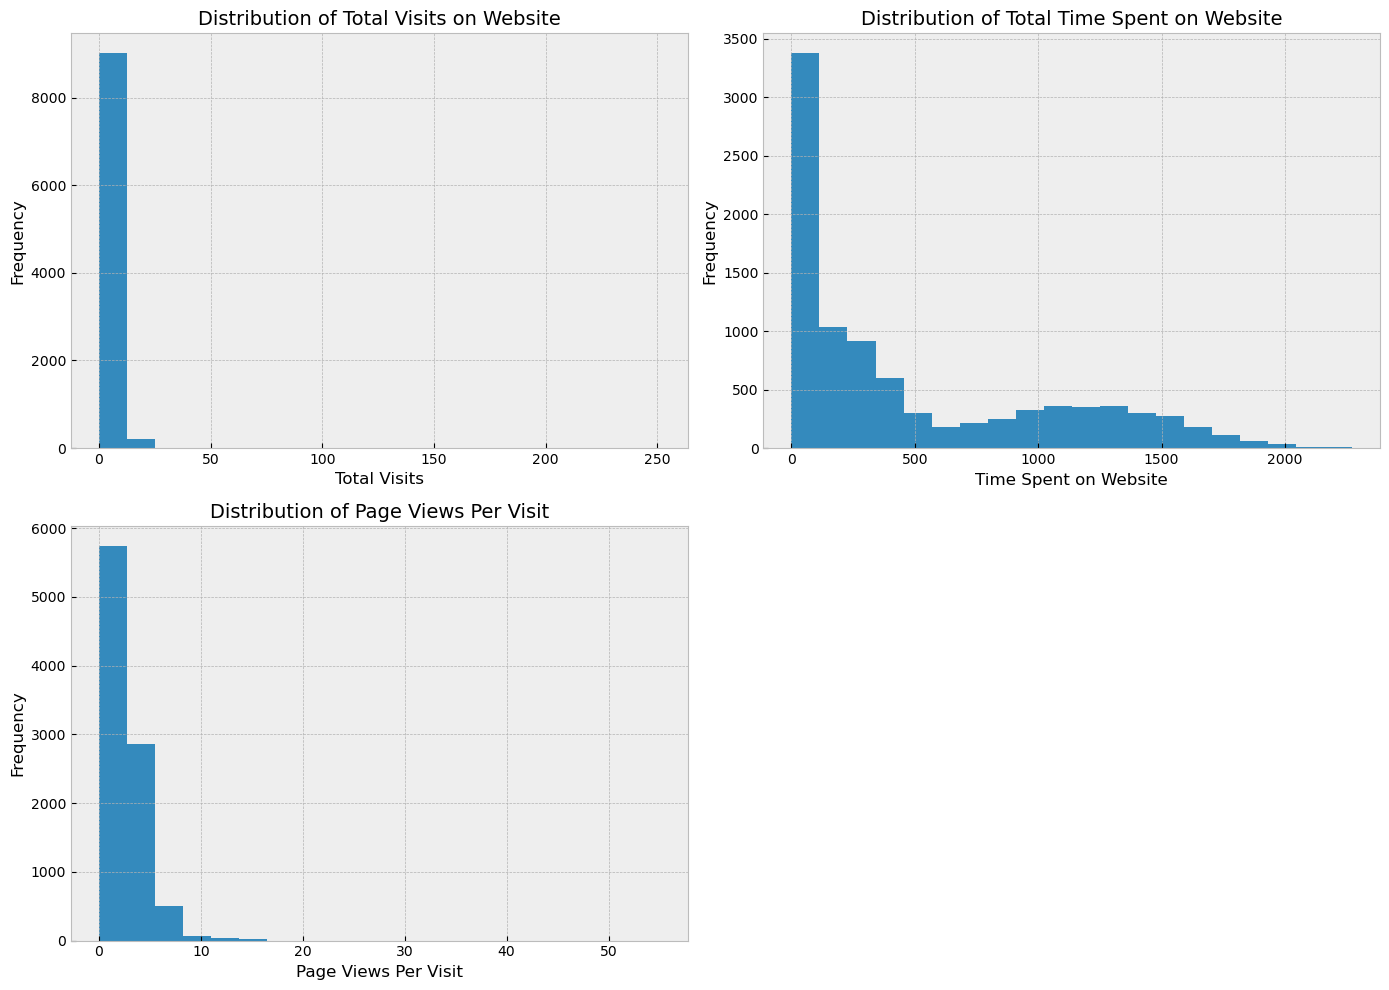

In [258]:
# Set style
plt.style.use('bmh')

# See distribution of each of these columns
fig = plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.hist(Leads['TotalVisits'], bins=20)
plt.title('Distribution of Total Visits on Website', fontsize=14)
plt.xlabel('Total Visits', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.subplot(2, 2, 2)
plt.hist(Leads['Total Time Spent on Website'], bins=20)
plt.title('Distribution of Total Time Spent on Website', fontsize=14)
plt.xlabel('Time Spent on Website', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.subplot(2, 2, 3)
plt.hist(Leads['Page Views Per Visit'], bins=20)
plt.title('Distribution of Page Views Per Visit', fontsize=14)
plt.xlabel('Page Views Per Visit', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()


**Observation** :
There are high peaks and skewed data.
There might be a possibility of outliers.

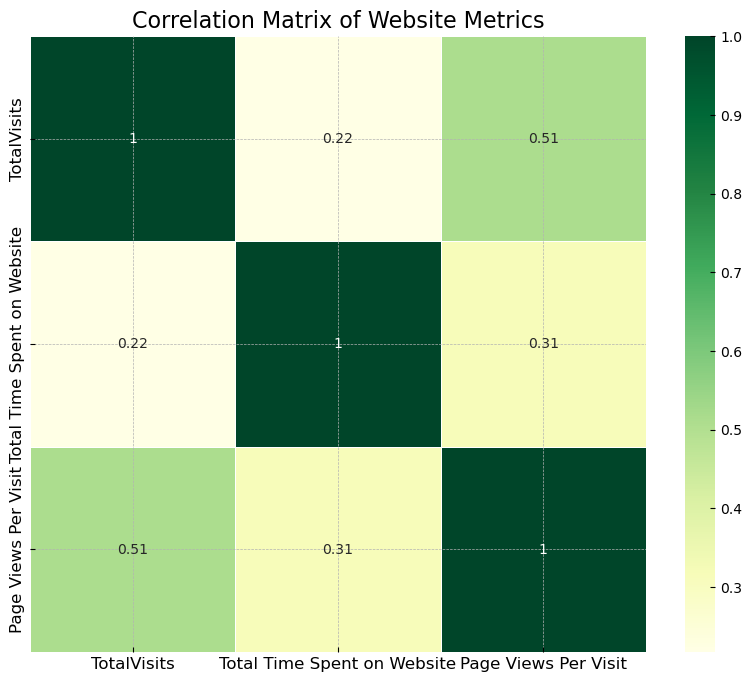

In [259]:
plt.figure(figsize=(10, 8))

# Generate the correlation matrix
correlation_matrix = Leads[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']].corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, cmap="YlGn", annot=True, square=True, linewidths=0.5)

# Set title and adjust font size
plt.title('Correlation Matrix of Website Metrics', fontsize=16)

# Adjust tick labels font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()

**Observations** : There are no significant correlations between the columns, suggesting that none of them can be dropped due to high correlation.

## 3.3 Checking for Outliers

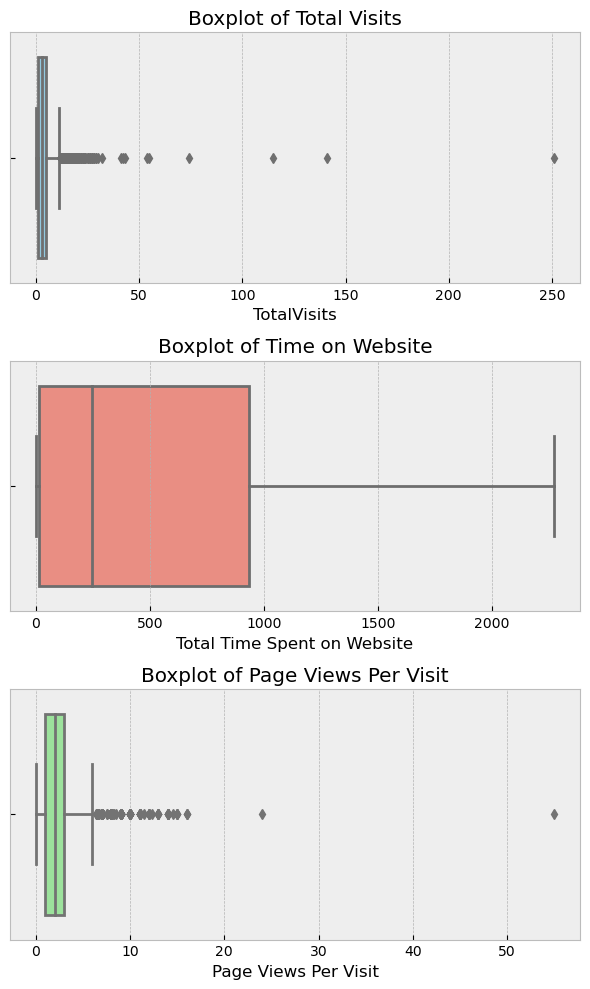

In [260]:
plt.figure(figsize=(6, 10))

# Boxplot for Total Visits
plt.subplot(3, 1, 1)
sns.boxplot(data=Leads, x='TotalVisits', color='skyblue')
plt.title('Boxplot of Total Visits')

# Boxplot for Time on Website
plt.subplot(3, 1, 2)
sns.boxplot(data=Leads, x='Total Time Spent on Website', color='salmon')
plt.title('Boxplot of Time on Website')

# Boxplot for Page Views Per Visit
plt.subplot(3, 1, 3)
sns.boxplot(data=Leads, x='Page Views Per Visit', color='lightgreen')
plt.title('Boxplot of Page Views Per Visit')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

"TotalVisits","Page Views Per Visit":Both these variables contain outliers as can be seen in the boxplot
So, These outliers needs to be treated for these variables

In [261]:
num_cols = Leads[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]

# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_cols.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.357440
std,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


**Observations**
Looking at the box plots and statistics of 'totalVisits' and 'Page Views Per Visit' ,We can see that there are upper bound outliers in both the columns and  It's also evident that the data can be capped at the 99th percentile.

In [262]:
#Renaming few column names for better usage
Leads.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)

In [263]:
# Capping both columns at the 99th percentile
# Suppress the SettingWithCopyWarning
pd.options.mode.chained_assignment = None
Leads.TotalVisits.loc[Leads.TotalVisits >= Leads.TotalVisits.quantile(0.99)] = Leads.TotalVisits.quantile(0.99)
Leads.Page_Views_Per_Visit.loc[Leads.Page_Views_Per_Visit >= Leads.Page_Views_Per_Visit.quantile(0.99)] = Leads.Page_Views_Per_Visit.quantile(0.99)

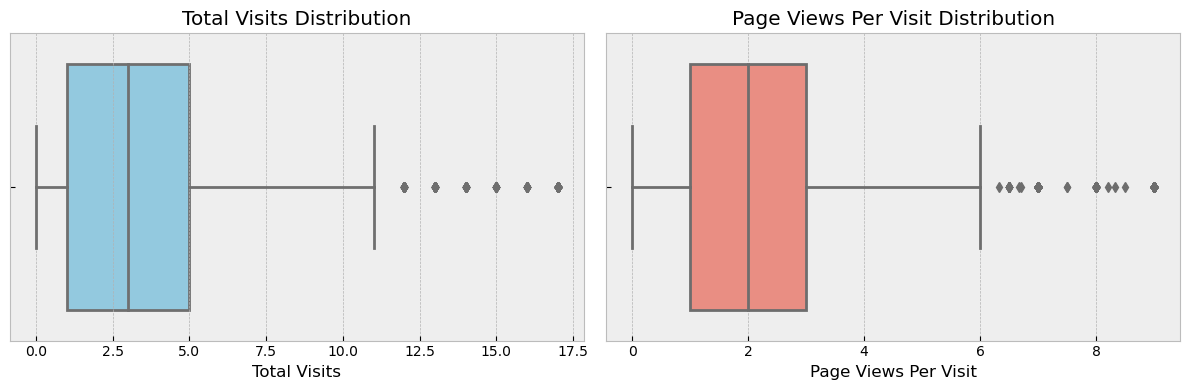

In [264]:
plt.figure(figsize=(12, 4))

# First subplot
plt.subplot(1, 2, 1)
sns.boxplot(x=Leads['TotalVisits'], color='skyblue')
plt.title('Total Visits Distribution')
plt.xlabel('Total Visits')

# Second subplot
plt.subplot(1, 2, 2)
sns.boxplot(x=Leads['Page_Views_Per_Visit'], color='salmon')
plt.title('Page Views Per Visit Distribution')
plt.xlabel('Page Views Per Visit') 

plt.tight_layout()
plt.show()


**Observation**: Now we can observe a significant reduction in outliers in both columns.

## 3.4 Categorical columns analysis

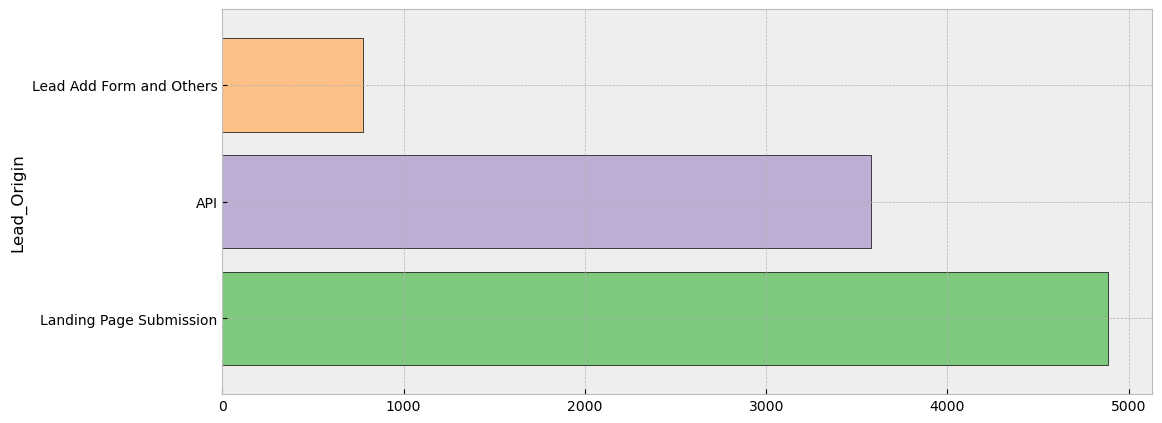

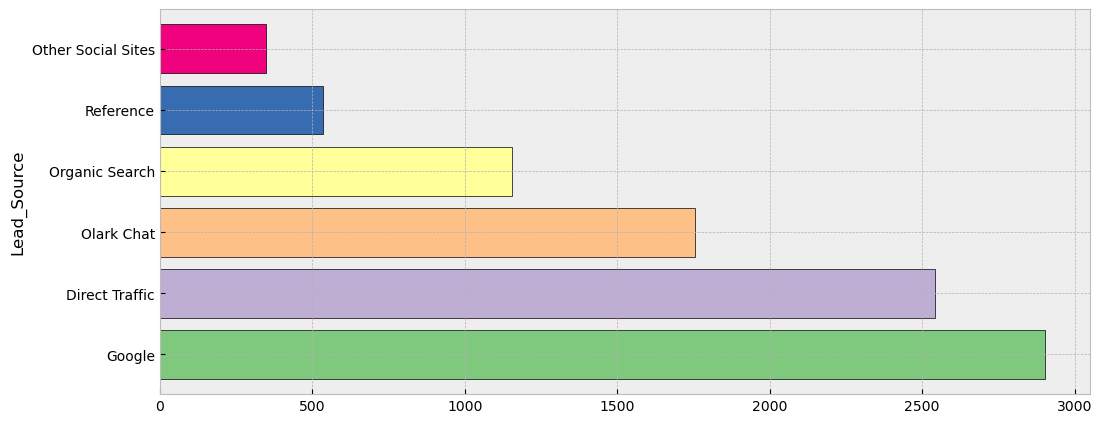

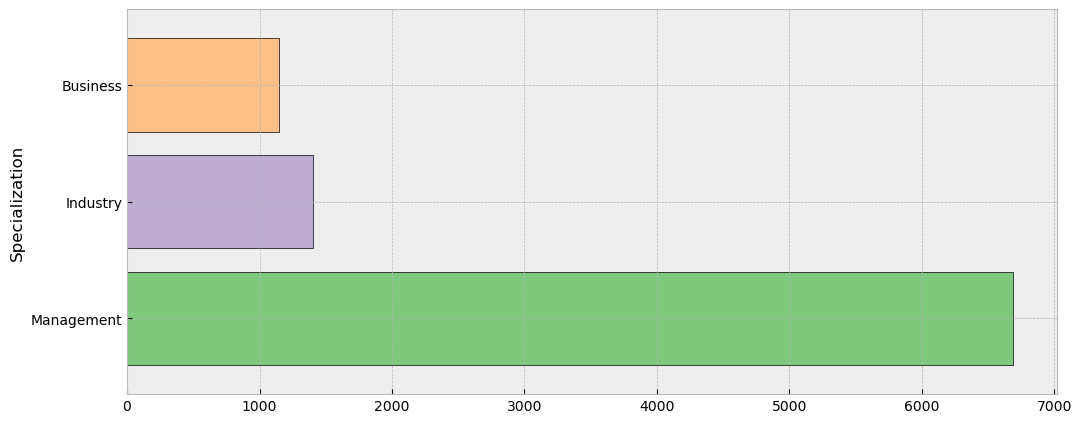

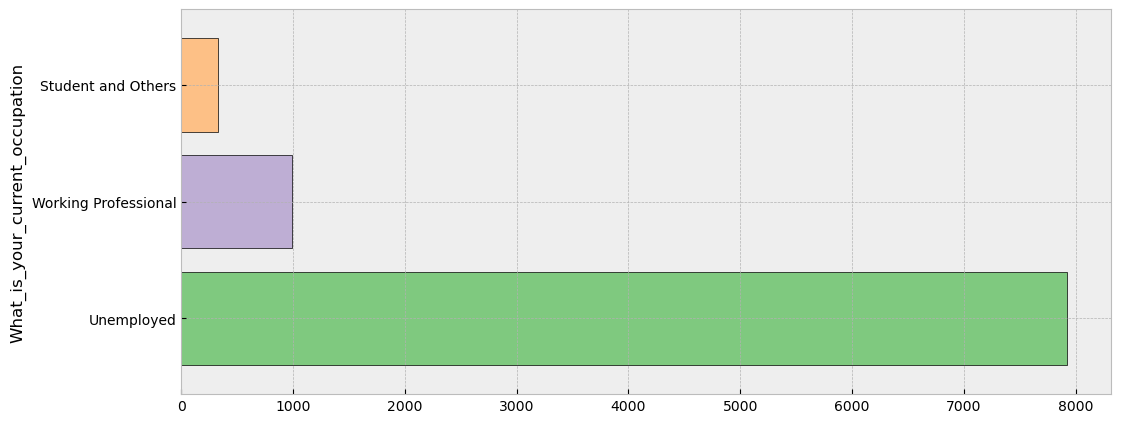

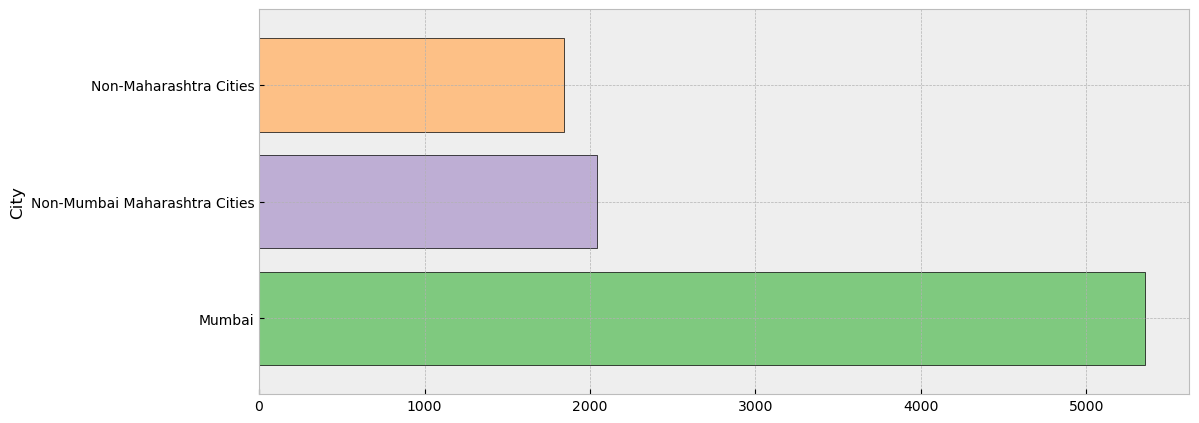

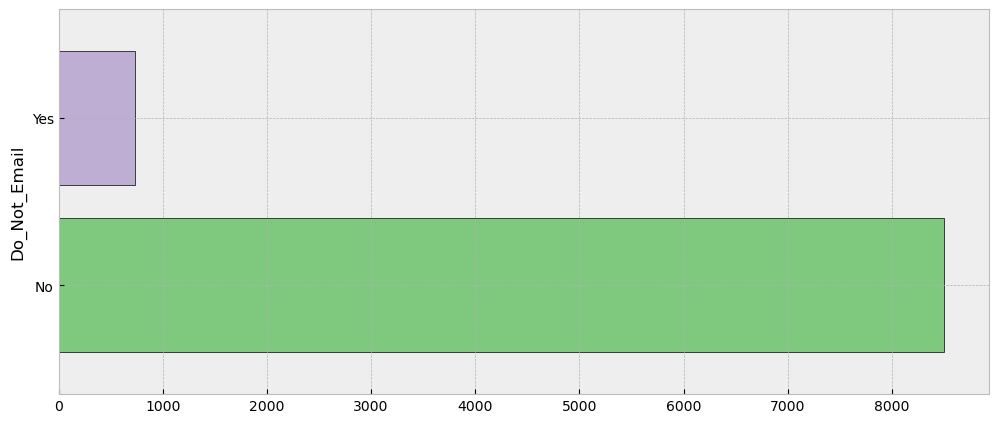

In [265]:
cat_cols=['Lead_Origin','Lead_Source','Specialization','What_is_your_current_occupation','City','Do_Not_Email']
for cols in cat_cols:
    plt.figure(figsize = (12, 5))
    Leads.groupby(cols)['Lead_Number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Accent(np.arange(len(Leads))))
    plt.show()

In [266]:
for k, v in Leads.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

Lead_Number = 9240
Lead_Origin = 3
Lead_Source = 6
Do_Not_Email = 2
Specialization = 3
What_is_your_current_occupation = 3
City = 3
A_free_copy_of_Mastering_The_Interview = 2


## 3.5 Converting Columns with Binary categories to 0/1

In [267]:
binary_cols = ['Do_Not_Email', 'A_free_copy_of_Mastering_The_Interview']

for bi in binary_cols:
    Leads[bi]=Leads[bi].map({'Yes': 1, "No": 0})

Leads.head()

,Lead_Number,Lead_Origin,Lead_Source,Do_Not_Email,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Specialization,What_is_your_current_occupation,City,A_free_copy_of_Mastering_The_Interview
0,660737,API,Olark Chat,0,0,0,0,0.0,Management,Unemployed,Non-Maharashtra Cities,0
1,660728,API,Organic Search,0,0,5,674,2.5,Industry,Unemployed,Non-Mumbai Maharashtra Cities,0
2,660727,Landing Page Submission,Direct Traffic,0,1,2,1532,2.0,Business,Student and Others,Mumbai,1
3,660719,Landing Page Submission,Direct Traffic,0,0,1,305,1.0,Industry,Unemployed,Mumbai,0
4,660681,Landing Page Submission,Google,0,1,2,1428,1.0,Business,Unemployed,Mumbai,0


## 3.6 Creating Dummy variables for remaining Categorical Columns

In [268]:
# Creating a dummy variable for the remaing categorical variables and dropping the first cat.
dummy = pd.get_dummies(Leads[['Lead_Origin', 'Lead_Source', 'Specialization', 'What_is_your_current_occupation', 'City']], drop_first = True)

# Adding the results to the master dataframe
Leads = pd.concat([Leads, dummy], axis=1)

In [269]:
# Dropping the columns for which dummies has been created
Leads.drop(['Lead_Origin', 'Lead_Source', 'Specialization', 'What_is_your_current_occupation', 'City'], axis = 1, inplace = True)

Leads.head()

,Lead_Number,Do_Not_Email,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,A_free_copy_of_Mastering_The_Interview,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form and Others,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Other Social Sites,Lead_Source_Reference,Specialization_Industry,Specialization_Management,What_is_your_current_occupation_Unemployed,What_is_your_current_occupation_Working Professional,City_Non-Maharashtra Cities,City_Non-Mumbai Maharashtra Cities
0,660737,0,0,0,0,0.0,0,0,0,0,1,0,0,0,0,1,1,0,1,0
1,660728,0,0,5,674,2.5,0,0,0,0,0,1,0,0,1,0,1,0,0,1
2,660727,0,1,2,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,1,305,1.0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
4,660681,0,1,2,1428,1.0,0,1,0,1,0,0,0,0,0,0,1,0,0,0


# Step 4 : Train-Test Split

In [270]:
# Adding feature variables to X by dropping 'Lead_Number' and 'Converted' columns
X = Leads.drop(['Lead_Number', 'Converted'], axis=1)

X.head(1)

,Do_Not_Email,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,A_free_copy_of_Mastering_The_Interview,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form and Others,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Other Social Sites,Lead_Source_Reference,Specialization_Industry,Specialization_Management,What_is_your_current_occupation_Unemployed,What_is_your_current_occupation_Working Professional,City_Non-Maharashtra Cities,City_Non-Mumbai Maharashtra Cities
0,0,0,0,0.0,0,0,0,0,1,0,0,0,0,1,1,0,1,0


In [271]:
# Putting response variable to y by selecting the 'converted' column
y = Leads['Converted']

y.head(1)

0    0
Name: Converted, dtype: int64

In [272]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Step 5 : Feature Scaling

In [273]:
scaler = StandardScaler()
X_train[['TotalVisits', 'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit']]=scaler.fit_transform(X_train[['TotalVisits','Total_Time_Spent_on_Website', 'Page_Views_Per_Visit']])
X_train.head()    

,Do_Not_Email,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,A_free_copy_of_Mastering_The_Interview,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form and Others,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Other Social Sites,Lead_Source_Reference,Specialization_Industry,Specialization_Management,What_is_your_current_occupation_Unemployed,What_is_your_current_occupation_Working Professional,City_Non-Maharashtra Cities,City_Non-Mumbai Maharashtra Cities
1871,0,-1.022595,-0.885371,-1.180474,0,0,0,0,1,0,0,0,0,1,1,0,0,0
6795,0,0.205373,0.005716,-0.503379,1,1,0,0,0,0,0,0,0,1,1,0,1,0
3516,0,0.512365,-0.691418,0.092260,0,0,0,0,1,0,0,0,0,0,1,0,0,1
8105,0,0.512365,1.365219,1.364995,0,1,0,1,0,0,0,0,1,0,1,0,0,0
3934,0,-1.022595,-0.885371,-1.180474,0,0,0,0,1,0,0,0,0,1,1,0,0,0


In [274]:
# Checking the conversion rate
conversion_rate = Leads['Converted'].mean() * 100
conversion_rate

38.53896103896104

## 5.1 Looking at the correlations

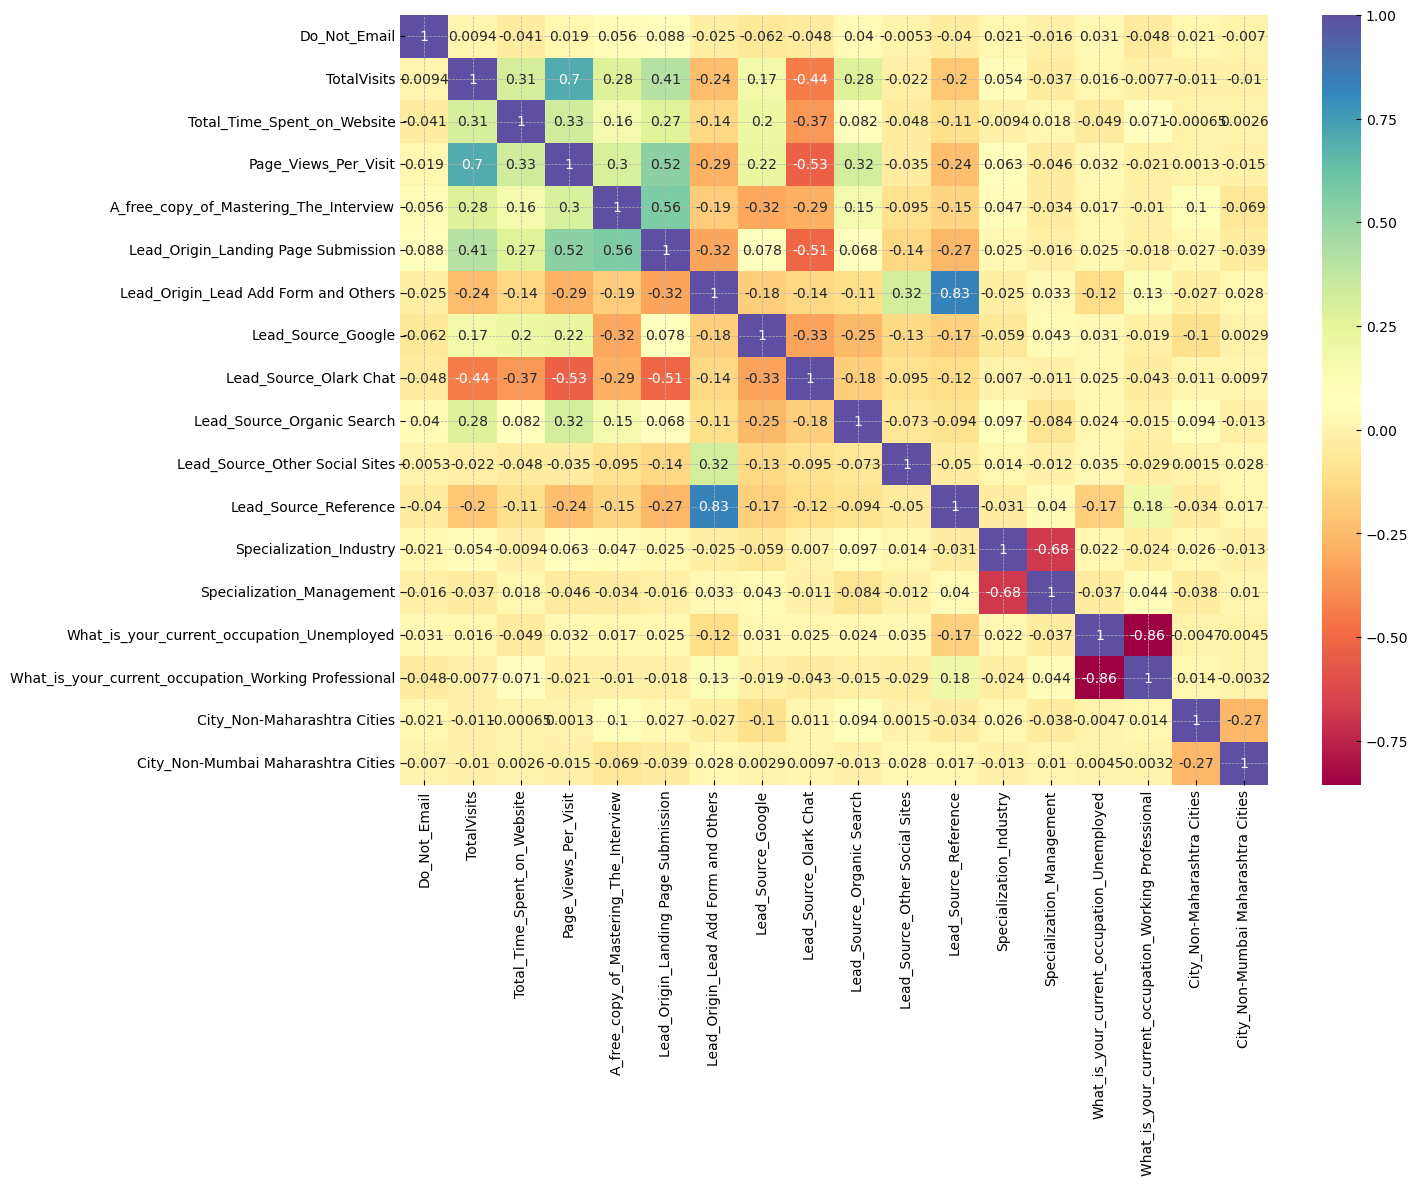

In [275]:
# Let's see the correlation matrix with heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(X_train.corr(numeric_only=True), annot=True, cmap="Spectral")
plt.show()


# Step 6 : Model Building

## Model-1

In [276]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3170.1
Date:                Mon, 15 Apr 2024   Deviance:                       6340.2
Time:                        21:33:12   Pearson chi2:                 6.87e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2947
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4295      0.221     -6.459      0.000      -1.863      -0.996
Do_Not_Email                                            -1.2968      0.151     -8.609      0.000      -1.592      -1.002
TotalVisits                                              0.1907      0.043      4.438      0.000       0.106       0.275
Total_Time_Spent_on_Website                              1.0914      0.037     29.805      0.000       1.020       1.163
Page_Views_Per_Visit                                    -0.0806      0.050     -1.627      0.104      -0.178       0.016
A_free_copy_of_Mastering_The_Interview                  -0.0269      0.096     -0.280      0.779      -0.215       0.161
Lead_Origin_Landing Page Submission                      0.0817      0.095      0.860      0.390      -0.104       0.268
Lead_Origin_Lead Add Form and Others                     3.6610      0.288     12.713      0.000       3.097       4.225
Lead_Source_Google                                       0.3257      0.102      3.183      0.001       0.125       0.526
Lead_Source_Olark Chat                                   0.9935      0.143      6.959      0.000       0.714       1.273
Lead_Source_Organic Search                               0.1566      0.118      1.326      0.185      -0.075       0.388
Lead_Source_Other Social Sites                          -0.2880      0.245     -1.177      0.239      -0.767       0.192
Lead_Source_Reference                                    0.5870      0.345      1.701      0.089      -0.090       1.263
Specialization_Industry                                  0.1317      0.121      1.088      0.276      -0.105       0.369
Specialization_Management                                0.1068      0.097      1.096      0.273      -0.084       0.298
What_is_your_current_occupation_Unemployed              -0.0143      0.176     -0.081      0.935      -0.359       0.330
What_is_your_current_occupation_Working Professional     1.3219      0.197      6.699      0.000       0.935       1.709
City_Non-Maharashtra Cities                              0.1359      0.081      1.675      0.094      -0.023       0.295
City_Non-Mumbai Maharashtra Cities                       0.1582      0.078      2.034      0.042       0.006       0.311
========================================================================================================================
"""

In [277]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,What_is_your_current_occupation_Unemployed,11.71
6,Lead_Origin_Lead Add Form and Others,6.59
13,Specialization_Management,5.92
11,Lead_Source_Reference,5.84
5,Lead_Origin_Landing Page Submission,4.74
8,Lead_Source_Olark Chat,3.27
7,Lead_Source_Google,3.05
4,A_free_copy_of_Mastering_The_Interview,2.90
3,Page_Views_Per_Visit,2.62
15,What_is_your_current_occupation_Working Profes...,2.46


### 6.1 Feature Selection using RFE

In [278]:
# initiate logistic regression
logreg = LogisticRegression()

# initiate rfe
rfe = RFE(logreg,n_features_to_select= 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [279]:
rfe.support_

array([ True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True])

In [280]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do_Not_Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total_Time_Spent_on_Website', True, 1),
 ('Page_Views_Per_Visit', True, 1),
 ('A_free_copy_of_Mastering_The_Interview', False, 4),
 ('Lead_Origin_Landing Page Submission', False, 2),
 ('Lead_Origin_Lead Add Form and Others', True, 1),
 ('Lead_Source_Google', True, 1),
 ('Lead_Source_Olark Chat', True, 1),
 ('Lead_Source_Organic Search', True, 1),
 ('Lead_Source_Other Social Sites', True, 1),
 ('Lead_Source_Reference', True, 1),
 ('Specialization_Industry', True, 1),
 ('Specialization_Management', True, 1),
 ('What_is_your_current_occupation_Unemployed', False, 3),
 ('What_is_your_current_occupation_Working Professional', True, 1),
 ('City_Non-Maharashtra Cities', True, 1),
 ('City_Non-Mumbai Maharashtra Cities', True, 1)]

In [281]:
# assign columns
col = X_train.columns[rfe.support_]

In [282]:
# check what columns were not selected by RFE
X_train.columns[~rfe.support_]

Index(['A_free_copy_of_Mastering_The_Interview',
       'Lead_Origin_Landing Page Submission',
       'What_is_your_current_occupation_Unemployed'],
      dtype='object')

In [283]:
X_train=X_train[col]

## Model-2

In [284]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3170.5
Date:                Mon, 15 Apr 2024   Deviance:                       6340.9
Time:                        21:33:13   Pearson chi2:                 6.88e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2946
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3884      0.112    -12.411      0.000      -1.608      -1.169
Do_Not_Email                                            -1.2932      0.151     -8.589      0.000      -1.588      -0.998
TotalVisits                                              0.1902      0.043      4.452      0.000       0.106       0.274
Total_Time_Spent_on_Website                              1.0910      0.037     29.807      0.000       1.019       1.163
Page_Views_Per_Visit                                    -0.0714      0.048     -1.481      0.139      -0.166       0.023
Lead_Origin_Lead Add Form and Others                     3.6449      0.287     12.678      0.000       3.081       4.208
Lead_Source_Google                                       0.3136      0.081      3.862      0.000       0.154       0.473
Lead_Source_Olark Chat                                   0.9467      0.118      8.004      0.000       0.715       1.179
Lead_Source_Organic Search                               0.1306      0.111      1.182      0.237      -0.086       0.347
Lead_Source_Other Social Sites                          -0.3224      0.234     -1.375      0.169      -0.782       0.137
Lead_Source_Reference                                    0.5569      0.339      1.643      0.100      -0.107       1.221
Specialization_Industry                                  0.1323      0.121      1.094      0.274      -0.105       0.369
Specialization_Management                                0.1071      0.097      1.099      0.272      -0.084       0.298
What_is_your_current_occupation_Working Professional     1.3371      0.102     13.165      0.000       1.138       1.536
City_Non-Maharashtra Cities                              0.1351      0.081      1.669      0.095      -0.024       0.294
City_Non-Mumbai Maharashtra Cities                       0.1580      0.078      2.035      0.042       0.006       0.310
========================================================================================================================
"""

In [285]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead_Origin_Lead Add Form and Others,6.55
9,Lead_Source_Reference,5.64
11,Specialization_Management,2.91
3,Page_Views_Per_Visit,2.49
6,Lead_Source_Olark Chat,2.21
1,TotalVisits,2.02
8,Lead_Source_Other Social Sites,1.88
5,Lead_Source_Google,1.81
7,Lead_Source_Organic Search,1.44
10,Specialization_Industry,1.42


In [287]:
# Dropping 'Specialization_Industry' variables as it has high p-value

X_train.drop('Specialization_Industry',axis= 1,inplace=True)

## Model-3

In [288]:
logm3 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3171.1
Date:                Mon, 15 Apr 2024   Deviance:                       6342.1
Time:                        21:36:00   Pearson chi2:                 6.87e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2945
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3156      0.089    -14.718      0.000      -1.491      -1.140
Do_Not_Email                                            -1.2922      0.151     -8.580      0.000      -1.587      -0.997
TotalVisits                                              0.1910      0.043      4.470      0.000       0.107       0.275
Total_Time_Spent_on_Website                              1.0907      0.037     29.804      0.000       1.019       1.162
Page_Views_Per_Visit                                    -0.0701      0.048     -1.453      0.146      -0.165       0.024
Lead_Origin_Lead Add Form and Others                     3.6462      0.288     12.678      0.000       3.083       4.210
Lead_Source_Google                                       0.3113      0.081      3.836      0.000       0.152       0.470
Lead_Source_Olark Chat                                   0.9491      0.118      8.026      0.000       0.717       1.181
Lead_Source_Organic Search                               0.1345      0.110      1.217      0.223      -0.082       0.351
Lead_Source_Other Social Sites                          -0.3210      0.235     -1.368      0.171      -0.781       0.139
Lead_Source_Reference                                    0.5549      0.339      1.638      0.102      -0.109       1.219
Specialization_Management                                0.0341      0.070      0.483      0.629      -0.104       0.172
What_is_your_current_occupation_Working Professional     1.3391      0.102     13.180      0.000       1.140       1.538
City_Non-Maharashtra Cities                              0.1351      0.081      1.669      0.095      -0.024       0.294
City_Non-Mumbai Maharashtra Cities                       0.1574      0.078      2.026      0.043       0.005       0.310
========================================================================================================================
"""

In [289]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead_Origin_Lead Add Form and Others,6.54
9,Lead_Source_Reference,5.61
3,Page_Views_Per_Visit,2.47
10,Specialization_Management,2.37
1,TotalVisits,2.02
6,Lead_Source_Olark Chat,1.97
8,Lead_Source_Other Social Sites,1.85
5,Lead_Source_Google,1.62
7,Lead_Source_Organic Search,1.35
13,City_Non-Mumbai Maharashtra Cities,1.31


In [290]:
#Dropping 'Specialization_Management' as it has high p-value
X_train.drop('Specialization_Management',axis=1,inplace=True)

## Model-4

In [291]:
logm4 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3171.2
Date:                Mon, 15 Apr 2024   Deviance:                       6342.3
Time:                        21:37:10   Pearson chi2:                 6.87e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2945
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2903      0.072    -17.848      0.000      -1.432      -1.149
Do_Not_Email                                            -1.2936      0.151     -8.589      0.000      -1.589      -0.998
TotalVisits                                              0.1909      0.043      4.468      0.000       0.107       0.275
Total_Time_Spent_on_Website                              1.0910      0.037     29.817      0.000       1.019       1.163
Page_Views_Per_Visit                                    -0.0708      0.048     -1.467      0.142      -0.165       0.024
Lead_Origin_Lead Add Form and Others                     3.6458      0.288     12.678      0.000       3.082       4.209
Lead_Source_Google                                       0.3118      0.081      3.844      0.000       0.153       0.471
Lead_Source_Olark Chat                                   0.9478      0.118      8.018      0.000       0.716       1.180
Lead_Source_Organic Search                               0.1310      0.110      1.189      0.235      -0.085       0.347
Lead_Source_Other Social Sites                          -0.3223      0.235     -1.374      0.170      -0.782       0.138
Lead_Source_Reference                                    0.5566      0.339      1.642      0.100      -0.108       1.221
What_is_your_current_occupation_Working Professional     1.3412      0.102     13.211      0.000       1.142       1.540
City_Non-Maharashtra Cities                              0.1344      0.081      1.660      0.097      -0.024       0.293
City_Non-Mumbai Maharashtra Cities                       0.1572      0.078      2.025      0.043       0.005       0.309
========================================================================================================================
"""

In [292]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead_Origin_Lead Add Form and Others,6.54
9,Lead_Source_Reference,5.54
3,Page_Views_Per_Visit,2.47
1,TotalVisits,2.02
8,Lead_Source_Other Social Sites,1.82
6,Lead_Source_Olark Chat,1.70
7,Lead_Source_Organic Search,1.28
12,City_Non-Mumbai Maharashtra Cities,1.26
5,Lead_Source_Google,1.25
2,Total_Time_Spent_on_Website,1.24


In [293]:
X_train.drop('Lead_Source_Organic Search',axis=1,inplace=True)

## Model-5

In [294]:
logm5 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3171.9
Date:                Mon, 15 Apr 2024   Deviance:                       6343.7
Time:                        21:38:14   Pearson chi2:                 6.88e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2943
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2546      0.066    -19.152      0.000      -1.383      -1.126
Do_Not_Email                                            -1.2960      0.151     -8.606      0.000      -1.591      -1.001
TotalVisits                                              0.1954      0.043      4.594      0.000       0.112       0.279
Total_Time_Spent_on_Website                              1.0899      0.037     29.802      0.000       1.018       1.162
Page_Views_Per_Visit                                    -0.0628      0.048     -1.315      0.188      -0.156       0.031
Lead_Origin_Lead Add Form and Others                     3.6641      0.287     12.753      0.000       3.101       4.227
Lead_Source_Google                                       0.2718      0.074      3.691      0.000       0.127       0.416
Lead_Source_Olark Chat                                   0.9228      0.116      7.946      0.000       0.695       1.150
Lead_Source_Other Social Sites                          -0.3667      0.232     -1.583      0.113      -0.821       0.087
Lead_Source_Reference                                    0.5143      0.337      1.526      0.127      -0.146       1.175
What_is_your_current_occupation_Working Professional     1.3398      0.102     13.199      0.000       1.141       1.539
City_Non-Maharashtra Cities                              0.1398      0.081      1.730      0.084      -0.019       0.298
City_Non-Mumbai Maharashtra Cities                       0.1586      0.078      2.042      0.041       0.006       0.311
========================================================================================================================
"""

In [295]:
X_train.drop('Page_Views_Per_Visit',axis=1,inplace=True)

## Model-6

In [296]:
logm6 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm6.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3172.7
Date:                Mon, 15 Apr 2024   Deviance:                       6345.5
Time:                        21:38:42   Pearson chi2:                 6.90e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2941
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2707      0.064    -19.718      0.000      -1.397      -1.144
Do_Not_Email                                            -1.2933      0.151     -8.589      0.000      -1.588      -0.998
TotalVisits                                              0.1663      0.036      4.569      0.000       0.095       0.238
Total_Time_Spent_on_Website                              1.0884      0.037     29.788      0.000       1.017       1.160
Lead_Origin_Lead Add Form and Others                     3.7226      0.284     13.090      0.000       3.165       4.280
Lead_Source_Google                                       0.2744      0.074      3.730      0.000       0.130       0.419
Lead_Source_Olark Chat                                   0.9803      0.108      9.090      0.000       0.769       1.192
Lead_Source_Other Social Sites                          -0.3727      0.232     -1.606      0.108      -0.827       0.082
Lead_Source_Reference                                    0.5122      0.337      1.518      0.129      -0.149       1.173
What_is_your_current_occupation_Working Professional     1.3389      0.101     13.195      0.000       1.140       1.538
City_Non-Maharashtra Cities                              0.1398      0.081      1.730      0.084      -0.019       0.298
City_Non-Mumbai Maharashtra Cities                       0.1581      0.078      2.036      0.042       0.006       0.310
========================================================================================================================
"""

In [297]:
X_train.drop('Lead_Source_Reference',axis=1,inplace=True)

## Model-7

In [298]:
logm7 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm7.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3173.9
Date:                Mon, 15 Apr 2024   Deviance:                       6347.8
Time:                        21:39:16   Pearson chi2:                 6.86e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2939
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2590      0.064    -19.706      0.000      -1.384      -1.134
Do_Not_Email                                            -1.3067      0.151     -8.666      0.000      -1.602      -1.011
TotalVisits                                              0.1667      0.036      4.576      0.000       0.095       0.238
Total_Time_Spent_on_Website                              1.0885      0.037     29.780      0.000       1.017       1.160
Lead_Origin_Lead Add Form and Others                     4.0774      0.170     23.959      0.000       3.744       4.411
Lead_Source_Google                                       0.2592      0.073      3.554      0.000       0.116       0.402
Lead_Source_Olark Chat                                   0.9690      0.108      9.010      0.000       0.758       1.180
Lead_Source_Other Social Sites                          -0.5856      0.192     -3.053      0.002      -0.962      -0.210
What_is_your_current_occupation_Working Professional     1.3481      0.101     13.326      0.000       1.150       1.546
City_Non-Maharashtra Cities                              0.1361      0.081      1.685      0.092      -0.022       0.294
City_Non-Mumbai Maharashtra Cities                       0.1582      0.078      2.037      0.042       0.006       0.310
========================================================================================================================
"""

In [299]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead_Source_Olark Chat,1.49
1,TotalVisits,1.36
3,Lead_Origin_Lead Add Form and Others,1.35
2,Total_Time_Spent_on_Website,1.24
9,City_Non-Mumbai Maharashtra Cities,1.22
4,Lead_Source_Google,1.18
6,Lead_Source_Other Social Sites,1.16
8,City_Non-Maharashtra Cities,1.15
7,What_is_your_current_occupation_Working Profes...,1.13
0,Do_Not_Email,1.05


The VIFs are now all less than 5. So let's drop the ones with the high p-values beginning with 'City_Non-Maharashtra Cities'

In [300]:
X_train.drop('City_Non-Maharashtra Cities',axis=1,inplace=True)

## Model-8

In [301]:
logm8 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm8.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6458
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3175.3
Date:                Mon, 15 Apr 2024   Deviance:                       6350.6
Time:                        21:41:06   Pearson chi2:                 6.83e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2936
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2156      0.058    -20.876      0.000      -1.330      -1.101
Do_Not_Email                                            -1.3010      0.151     -8.639      0.000      -1.596      -1.006
TotalVisits                                              0.1642      0.036      4.514      0.000       0.093       0.236
Total_Time_Spent_on_Website                              1.0887      0.037     29.784      0.000       1.017       1.160
Lead_Origin_Lead Add Form and Others                     4.0634      0.170     23.913      0.000       3.730       4.396
Lead_Source_Google                                       0.2428      0.072      3.361      0.001       0.101       0.384
Lead_Source_Olark Chat                                   0.9607      0.107      8.951      0.000       0.750       1.171
Lead_Source_Other Social Sites                          -0.5820      0.191     -3.041      0.002      -0.957      -0.207
What_is_your_current_occupation_Working Professional     1.3505      0.101     13.357      0.000       1.152       1.549
City_Non-Mumbai Maharashtra Cities                       0.1226      0.075      1.642      0.101      -0.024       0.269
========================================================================================================================
"""

In [302]:
X_train.drop('City_Non-Mumbai Maharashtra Cities',axis=1,inplace=True)

## Model-9

In [303]:
logm9 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res=logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6459
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3176.6
Date:                Mon, 15 Apr 2024   Deviance:                       6353.3
Time:                        21:41:32   Pearson chi2:                 6.82e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2933
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1901      0.056    -21.253      0.000      -1.300      -1.080
Do_Not_Email                                            -1.3037      0.151     -8.655      0.000      -1.599      -1.008
TotalVisits                                              0.1643      0.036      4.517      0.000       0.093       0.236
Total_Time_Spent_on_Website                              1.0892      0.037     29.805      0.000       1.018       1.161
Lead_Origin_Lead Add Form and Others                     4.0709      0.170     23.959      0.000       3.738       4.404
Lead_Source_Google                                       0.2445      0.072      3.386      0.001       0.103       0.386
Lead_Source_Olark Chat                                   0.9642      0.107      8.988      0.000       0.754       1.175
Lead_Source_Other Social Sites                          -0.5759      0.191     -3.009      0.003      -0.951      -0.201
What_is_your_current_occupation_Working Professional     1.3494      0.101     13.355      0.000       1.151       1.547
========================================================================================================================
"""

All the p-values are now within the appropriate range. Let's also recheck the VIFs to ensure we haven't overlooked anything.

In [304]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,TotalVisits,1.35
5,Lead_Source_Olark Chat,1.33
3,Lead_Origin_Lead Add Form and Others,1.32
2,Total_Time_Spent_on_Website,1.23
6,Lead_Source_Other Social Sites,1.15
7,What_is_your_current_occupation_Working Profes...,1.11
4,Lead_Source_Google,1.09
0,Do_Not_Email,1.03


Now, both the p-values and VIFs seem acceptable for all the variables. Let's proceed with making predictions using this final set of features.

# Step 7 : Model Evaluation

In [305]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

1871    0.204535
6795    0.240474
3516    0.290145
8105    0.651491
3934    0.204535
4844    0.902214
3297    0.141866
8071    0.980711
987     0.227295
7423    0.766443
dtype: float64

In [306]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.2045352 , 0.24047387, 0.29014462, 0.65149055, 0.2045352 ,
       0.90221433, 0.14186594, 0.98071131, 0.2272954 , 0.76644276])

In [307]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.204535
1,0,0.240474
2,0,0.290145
3,0,0.651491
4,0,0.204535


In [308]:
# Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.204535,0
1,0,0.240474,0
2,0,0.290145,0
3,0,0.651491,1
4,0,0.204535,0


Now that we have the probabilities and have also made conversion predictions using them, it's time to evaluate the model.

## 7.1 Confusion matrix

In [309]:
# Creating confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3487  515]
 [ 935 1531]]


## 7.2 Accuracy

In [310]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7758194186765616


## 7.3 Metrics beyond accuracy

In [311]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [312]:
# Calculate the sensitivity

TP/(TP+FN)

0.6208434712084347

In [313]:
# Calculate the specificity

TN/(TN+FP)

0.8713143428285857

**Finding the Optimal Cutoff:**
Now, 0.5 was just arbitrary for loosely checking the model performance. However, to obtain good results, we need to optimize the threshold. So first, let's plot an ROC curve to see what AUC we get.

## 7.4 Plotting the ROC curve

In [314]:
# ROC curve function
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    return None

In [315]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

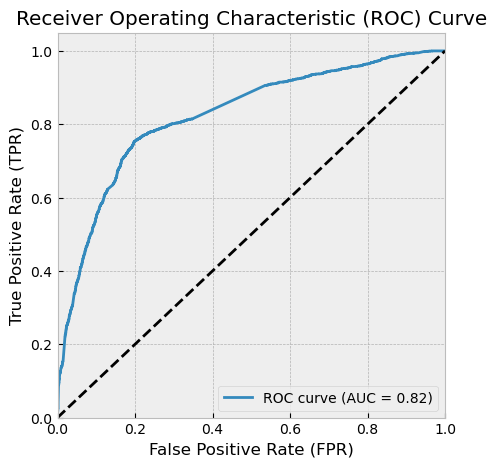

In [316]:
# Calling the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.82 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

### 7.4.1 Finding Optimal Cutoff Point/ Probability

In [317]:
# Define probability cutoffs
cutoffs = [float(x)/10 for x in range(10)]

# Create columns with different probability cutoffs
for cutoff in cutoffs:
    y_train_pred_final[cutoff] = (y_train_pred_final['Conversion_Prob'] > cutoff).astype(int)

# Display the dataframe
print(y_train_pred_final.head())

   Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.204535          0    1    1    1    0    0    0    0   
1          0         0.240474          0    1    1    1    0    0    0    0   
2          0         0.290145          0    1    1    1    0    0    0    0   
3          0         0.651491          1    1    1    1    1    1    1    1   
4          0         0.204535          0    1    1    1    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0  


In [318]:
# Define probability cutoffs
num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Initialize dataframe to store results
cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensitivity', 'specificity'])

# Iterate through each probability cutoff
for i in num:
    # Compute confusion matrix
    cm = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i])
    
    # Calculate accuracy, sensitivity, and specificity
    total = sum(sum(cm))
    accuracy = (cm[0, 0] + cm[1, 1]) / total
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    
    # Store results in dataframe
    cutoff_df.loc[i] = [i, accuracy, sensitivity, specificity]

print(cutoff_df)


     prob  accuracy  sensitivity  specificity
0.0   0.0  0.381262     1.000000     0.000000
0.1   0.1  0.436920     0.992701     0.094453
0.2   0.2  0.627087     0.907948     0.454023
0.3   0.3  0.776283     0.768856     0.780860
0.4   0.4  0.783086     0.713301     0.826087
0.5   0.5  0.775819     0.620843     0.871314
0.6   0.6  0.761905     0.531630     0.903798
0.7   0.7  0.737631     0.410787     0.939030
0.8   0.8  0.703463     0.270884     0.970015
0.9   0.9  0.658782     0.113544     0.994753


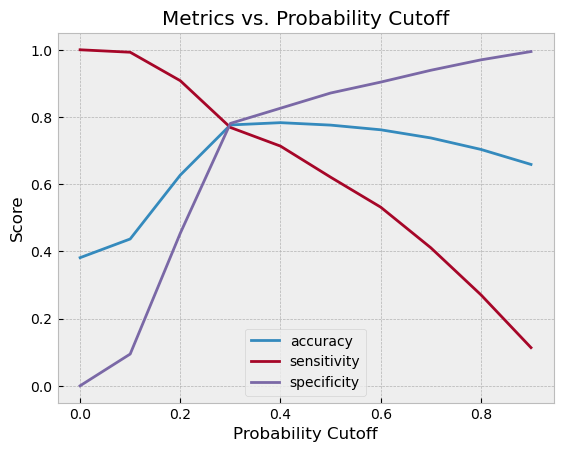

In [319]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy', 'sensitivity', 'specificity'])
plt.xlabel('Probability Cutoff')
plt.ylabel('Score')
plt.title('Metrics vs. Probability Cutoff')
plt.grid(True)
plt.legend(loc='best')
plt.show()

As we can see that around 0.3, we get the optimal values of the three metrics. So let's choose 0.3 as our cutoff now.

In [320]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.204535,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.240474,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.290145,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.651491,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.204535,0,1,1,1,0,0,0,0,0,0,0,0


### 7.5 Calculating all metrics using confusion matrix for Train

In [321]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7762832405689548

In [322]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3125,  877],
       [ 570, 1896]], dtype=int64)

In [323]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [324]:
# Calculate Sensitivity

TP/(TP+FN)

0.7688564476885644

In [325]:
# Calculate Specificity

TN/(TN+FP)

0.7808595702148926

This cutoff point seems good to go!

## Making Predictions on the Test Set

In [326]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit']] = scaler.transform(X_test[['TotalVisits', 'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit']])

In [327]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,Do_Not_Email,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Lead_Origin_Lead Add Form and Others,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Other Social Sites,Lead_Source_Reference,Specialization_Industry,Specialization_Management,What_is_your_current_occupation_Working Professional,City_Non-Maharashtra Cities,City_Non-Mumbai Maharashtra Cities
4269,0,1.433341,0.964504,2.892276,0,0,0,0,0,0,1,0,0,0,0
2376,0,-1.022595,-0.885371,-1.180474,1,0,0,0,0,1,1,0,0,0,0
7766,0,0.512365,-0.777416,1.364995,0,1,0,0,0,0,0,1,1,0,1
9199,0,-1.022595,-0.885371,-1.180474,0,0,1,0,0,0,0,1,0,0,0
4359,0,-1.022595,-0.885371,-1.180474,1,0,0,0,0,1,0,1,0,0,1


In [328]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [329]:
# Check X_test_sm

X_test_sm

,const,Do_Not_Email,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Lead_Origin_Lead Add Form and Others,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Other Social Sites,Lead_Source_Reference,Specialization_Industry,Specialization_Management,What_is_your_current_occupation_Working Professional,City_Non-Maharashtra Cities,City_Non-Mumbai Maharashtra Cities
4269,1.0,0,1.433341,0.964504,2.892276,0,0,0,0,0,0,1,0,0,0,0
2376,1.0,0,-1.022595,-0.885371,-1.180474,1,0,0,0,0,1,1,0,0,0,0
7766,1.0,0,0.512365,-0.777416,1.364995,0,1,0,0,0,0,0,1,1,0,1
9199,1.0,0,-1.022595,-0.885371,-1.180474,0,0,1,0,0,0,0,1,0,0,0
4359,1.0,0,-1.022595,-0.885371,-1.180474,1,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8649,1.0,0,3.582285,-0.354744,-0.416833,0,0,0,0,0,0,0,1,0,0,0
2152,1.0,0,-1.022595,-0.885371,-1.180474,1,1,0,0,0,0,0,0,0,0,1
7101,1.0,0,-1.022595,-0.885371,-1.180474,0,0,1,0,0,0,0,1,0,0,0
5331,1.0,1,-0.101619,2.056864,0.346807,0,0,0,0,0,0,1,0,0,0,0


In [330]:
# Get the columns in X_train
train_columns = X_train.columns

# Drop columns in X_test that are not present in X_train
X_test = X_test[train_columns]

In [331]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [332]:
y_test_pred[:10]

4269    0.523983
2376    0.851759
7766    0.411265
9199    0.204535
4359    0.851759
9186    0.364574
1631    0.548135
8963    0.199012
8007    0.527058
5324    0.166906
dtype: float64

In [333]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [334]:
# Let's see the head

y_pred_1.head()

,0
4269,0.523983
2376,0.851759
7766,0.411265
9199,0.204535
4359,0.851759


In [335]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [336]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [337]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [338]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.523983
1,1,0.851759
2,1,0.411265
3,0,0.204535
4,1,0.851759


In [339]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [340]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.523983
1,1,0.851759
2,1,0.411265
3,0,0.204535
4,1,0.851759


In [341]:
# Make predictions on the test set using 0.3 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [342]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.523983,1
1,1,0.851759,1
2,1,0.411265,1
3,0,0.204535,0
4,1,0.851759,1


In [343]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7727272727272727

In [344]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1308,  369],
       [ 261,  834]], dtype=int64)

In [345]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [346]:
# Calculate sensitivity
TP / float(TP+FN)

0.7616438356164383

In [347]:
# Calculate specificity
TN / float(TN+FP)

0.7799642218246869

## Precision-Recall View

Let's now also build the training model using the precision-recall view

In [348]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3487,  515],
       [ 935, 1531]], dtype=int64)

#### Precision
TP / TP + FP

In [349]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7482893450635386

#### Recall
TP / TP + FN

In [350]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6208434712084347

# Step 8 : Precision and recall tradeoff

In [351]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: Predicted, Length: 6468, dtype: int64)

In [352]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

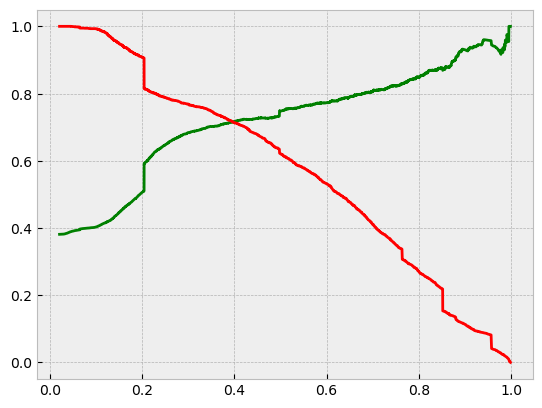

In [353]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [354]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.39 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.204535,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.240474,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.290145,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.651491,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.204535,0,1,1,1,0,0,0,0,0,0,0,0


In [355]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7830859616573902

In [356]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3289,  713],
       [ 690, 1776]], dtype=int64)

In [357]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [358]:
# Calculate Precision

TP/(TP+FP)

0.7135395741261551

In [359]:
# Calculate Recall

TP/(TP+FN)

0.7201946472019465

# Step 9 : Making Predictions on the Test Set

## 9.1 Prediction on Test Dataset using final model 

In [360]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [361]:
y_test_pred[:10]

4269    0.523983
2376    0.851759
7766    0.411265
9199    0.204535
4359    0.851759
9186    0.364574
1631    0.548135
8963    0.199012
8007    0.527058
5324    0.166906
dtype: float64

In [362]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [363]:
# Let's see the head

y_pred_1.head()

,0
4269,0.523983
2376,0.851759
7766,0.411265
9199,0.204535
4359,0.851759


In [364]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [365]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [366]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [367]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.523983
1,1,0.851759
2,1,0.411265
3,0,0.204535
4,1,0.851759


In [368]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [369]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.523983
1,1,0.851759
2,1,0.411265
3,0,0.204535
4,1,0.851759


In [370]:
# Make predictions on the test set using 0.39 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.39 else 0)

In [371]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.523983,1
1,1,0.851759,1
2,1,0.411265,1
3,0,0.204535,0
4,1,0.851759,1


## 8.2 Test set Model Evaluation
- Calculating all metrics using confusion matrix for Test set

In [372]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7745310245310245

In [373]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1370,  307],
       [ 318,  777]], dtype=int64)

In [374]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [375]:
# Calculate Precision

TP/(TP+FP)

0.716789667896679

In [376]:
# Calculate Recall

TP/(TP+FN)

0.7095890410958904

# CONCLUSION

#### After trying several models, we have finally chosen model 9 to be our final model with the following characteristics:
All variables have p-value < 0.05.
All the features have very low VIF values, meaning, there is hardly any muliticollinearity among the features. This is also evident from the heat map.
The overall accuracy 77.63% at a probability threshold of 0.3 on the test dataset is also very acceptable.

In the initial stage, a large number of leads are generated, but only a few of them convert into paying customers. During the middle stage, it is crucial to nurture potential leads effectively, which involves educating them about the product and maintaining consistent communication. To identify the best prospects among the leads, focus on factors such as 'Lead_Origin_Lead Add Form and Others', 'What_is_your_current_occupation_Working Professional' and 'Total_Time_Spent_on_Website' as these contribute significantly to the probability of lead conversion.

It's essential to maintain a list of leads to keep them informed about new courses, services, job offers, and future opportunities for higher studies. Monitor each lead carefully and tailor the information you send to them based on their interests. Providing job offerings, course information, or services that align with the leads' interests will enhance the likelihood of converting them into prospects.

Place particular emphasis on converted leads. Conduct question-answer sessions with leads to gather the necessary information about them. Schedule follow-up inquiries and appointments with the leads to understand their intentions and willingness to join online courses. A well-thought-out plan to address the needs of each lead will significantly improve lead capture and conversion rates